<a href="https://colab.research.google.com/github/juanpablocarrillohortua/ML-AGENTS-1/blob/main/Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [219]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/prevek18/ames-housing-dataset/versions/1


In [220]:
files = os.listdir(path)
print("Archivos descargados:", files)
df = pd.read_csv(os.path.join(path, "AmesHousing.csv"))
df.head()

Archivos descargados: ['AmesHousing.csv']


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# EDA

## Limpieza de Datos

In [221]:
df.columns
columnss = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice']

In [222]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Duplicados

In [223]:
df.duplicated().any()

False

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [225]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Data NaN

In [226]:
nans = df.isna().any() == True
nans[nans]

,0
Lot Frontage,True
Alley,True
Mas Vnr Type,True
Mas Vnr Area,True
Bsmt Qual,True
Bsmt Cond,True
Bsmt Exposure,True
BsmtFin Type 1,True
BsmtFin SF 1,True
BsmtFin Type 2,True


In [227]:
for col in df.columns:
    if col == 'Lot Frontage':  # Caso especial
        df[col].fillna(df[col].mean(), inplace=True)
    elif col in nans[nans].index:
        if df[col].dtype == 'object':
            df[col].fillna('none', inplace=True)
        elif df[col].dtype in ['int64', 'float64']:
            df[col].fillna(0, inplace=True)
        elif df[col].dtype == 'bool':
            df[col].fillna(False, inplace=True)

<ipython-input-227-54201e12c7d9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-227-54201e12c7d9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [228]:
nans = df.isna().any() == True
nans[nans]

,0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [230]:
#scatter_m = pd.plotting.scatter_matrix(df, figsize=(10,10))

### Graficos

In [231]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,none,IR1,Lvl,...,0,none,none,none,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,none,Reg,Lvl,...,0,none,MnPrv,none,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,none,IR1,Lvl,...,0,none,none,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,none,Reg,Lvl,...,0,none,none,none,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,none,IR1,Lvl,...,0,none,MnPrv,none,0,3,2010,WD,Normal,189900


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

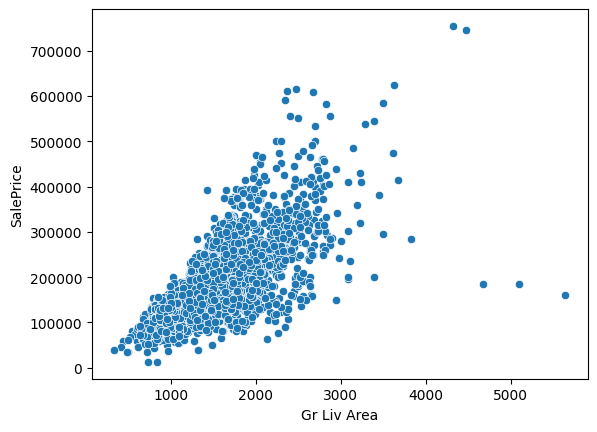

In [232]:
sns.scatterplot(data=df, x="Gr Liv Area", y="SalePrice")

<Axes: xlabel='Total Bsmt SF', ylabel='SalePrice'>

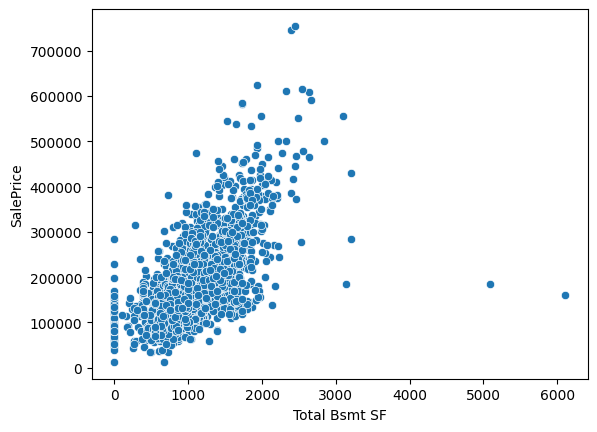

In [233]:
sns.scatterplot(data=df, x="Total Bsmt SF", y="SalePrice")

# Model

## Data Cleaning

In [234]:
df.set_index('Order', inplace=True)

### Label Encoder

In [235]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
            le.fit(df[col])
            df[col] = le.transform(df[col])

df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,5,141.00000,31770,1,2,0,3,0,...,0,4,4,5,0,5,2010,9,4,215000
2,526350040,20,4,80.00000,11622,1,2,3,3,0,...,0,4,2,5,0,6,2010,9,4,105000
3,526351010,20,5,81.00000,14267,1,2,0,3,0,...,0,4,4,1,12500,6,2010,9,4,172000
4,526353030,20,5,93.00000,11160,1,2,3,3,0,...,0,4,4,5,0,4,2010,9,4,244000
5,527105010,60,5,74.00000,13830,1,2,0,3,0,...,0,4,2,5,0,3,2010,9,4,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,923275080,80,5,37.00000,7937,1,2,0,3,0,...,0,4,0,5,0,3,2006,9,4,142500
2927,923276100,20,5,69.22459,8885,1,2,0,2,0,...,0,4,2,5,0,6,2006,9,4,131000
2928,923400125,85,5,62.00000,10441,1,2,3,3,0,...,0,4,2,3,700,7,2006,9,4,132000


In [236]:
s_sc = StandardScaler()
s_sc.fit(df)
df = s_sc.transform(df)
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.997164,-0.877005,0.037856,3.366911,2.744381,0.064128,0.256768,-1.374263,0.316016,-0.030805,...,-0.063031,0.060774,0.463460,0.187575,-0.089422,-0.448057,1.678499,0.34164,0.204566,0.428229
1,-0.996904,-0.877005,-1.117540,0.505463,0.187097,0.064128,0.256768,0.750587,0.316016,-0.030805,...,-0.063031,0.060774,-1.371590,0.187575,-0.089422,-0.079602,1.678499,0.34164,0.204566,-0.948957
2,-0.996899,-0.877005,0.037856,0.552372,0.522814,0.064128,0.256768,-1.374263,0.316016,-0.030805,...,-0.063031,0.060774,0.463460,-9.454431,21.985725,-0.079602,1.678499,0.34164,0.204566,-0.110125
3,-0.996888,-0.877005,0.037856,1.115280,0.128458,0.064128,0.256768,0.750587,0.316016,-0.030805,...,-0.063031,0.060774,0.463460,0.187575,-0.089422,-0.816513,1.678499,0.34164,0.204566,0.791305
4,-0.992903,0.061285,0.037856,0.224010,0.467348,0.064128,0.256768,-1.374263,0.316016,-0.030805,...,-0.063031,0.060774,-1.371590,0.187575,-0.089422,-1.184969,1.678499,0.34164,0.204566,0.113980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.106582,0.530430,0.037856,-1.511622,-0.280621,0.064128,0.256768,-1.374263,0.316016,-0.030805,...,-0.063031,0.060774,-3.206639,0.187575,-0.089422,-1.184969,-1.360118,0.34164,0.204566,-0.479462
2926,1.106588,-0.877005,0.037856,0.000000,-0.160296,0.064128,0.256768,-1.374263,-1.106299,-0.030805,...,-0.063031,0.060774,-1.371590,0.187575,-0.089422,-0.079602,-1.360118,0.34164,0.204566,-0.623440
2927,1.107245,0.647716,0.037856,-0.338898,0.037199,0.064128,0.256768,0.750587,0.316016,-0.030805,...,-0.063031,0.060774,-1.371590,-4.633428,1.146786,0.288854,-1.360118,0.34164,0.204566,-0.610920
2928,1.110954,-0.877005,0.037856,0.364736,-0.017506,0.064128,0.256768,0.750587,0.316016,-0.030805,...,-0.063031,0.060774,0.463460,0.187575,-0.089422,-0.816513,-1.360118,0.34164,0.204566,-0.135165


In [237]:
dfx = df.drop(80, axis=1)
dfy = df.loc[:, 80]

## Models

### Lasso

In [238]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=42)

In [239]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2344, 80)
(586, 80)
(2344,)
(586,)


In [240]:
lasso_cv = LassoCV(cv=5, random_state=42, n_alphas=1000).fit(X_train, y_train)

In [241]:
lasso_pred = lasso_cv.predict(X_test)

In [242]:
r2lasso = lasso_cv.score(X_test, y_test)
mselasso = mean_squared_error(y_test, lasso_pred)
rmselasso = np.sqrt(mselasso)

print(f"R2: {r2lasso}")
print(f"MSE: {mselasso}")
print(f"RMSE: {rmselasso}")

R2: 0.8629857377681389
MSE: 0.17218951798560247
RMSE: 0.4149572483830141


### Linreg

In [243]:
linreg = LinearRegression().fit(X_train, y_train)

In [244]:
linereg_pred = linreg.predict(X_test)

In [245]:
r2linreg = linreg.score(X_test, y_test)
mselinreg = mean_squared_error(y_test, linereg_pred)
rmselinreg = np.sqrt(mselinreg)

print(f"R2: {r2linreg}")
print(f"MSE: {mselinreg}")
print(f"RMSE: {rmselinreg}")

R2: 0.8614696163447658
MSE: 0.1740948686611145
RMSE: 0.4172467719001724


### Ridge

In [246]:
ridge_cv = RidgeCV(cv=5).fit(X_train, y_train)

In [247]:
ridge_pred = ridge_cv.predict(X_test)

In [248]:
r2ridge_cv = ridge_cv.score(X_test, y_test)
mseridge_cv = mean_squared_error(y_test, ridge_pred)
rmseridge_cv = np.sqrt(mseridge_cv)

print(f"R2: {r2ridge_cv}")
print(f"MSE: {mseridge_cv}")
print(f"RMSE: {rmseridge_cv}")

R2: 0.861550749021609
MSE: 0.17399290703835396
RMSE: 0.4171245701686176


In [249]:
rr = ridge_cv.coef_

In [250]:
df.columns

RangeIndex(start=0, stop=81, step=1)

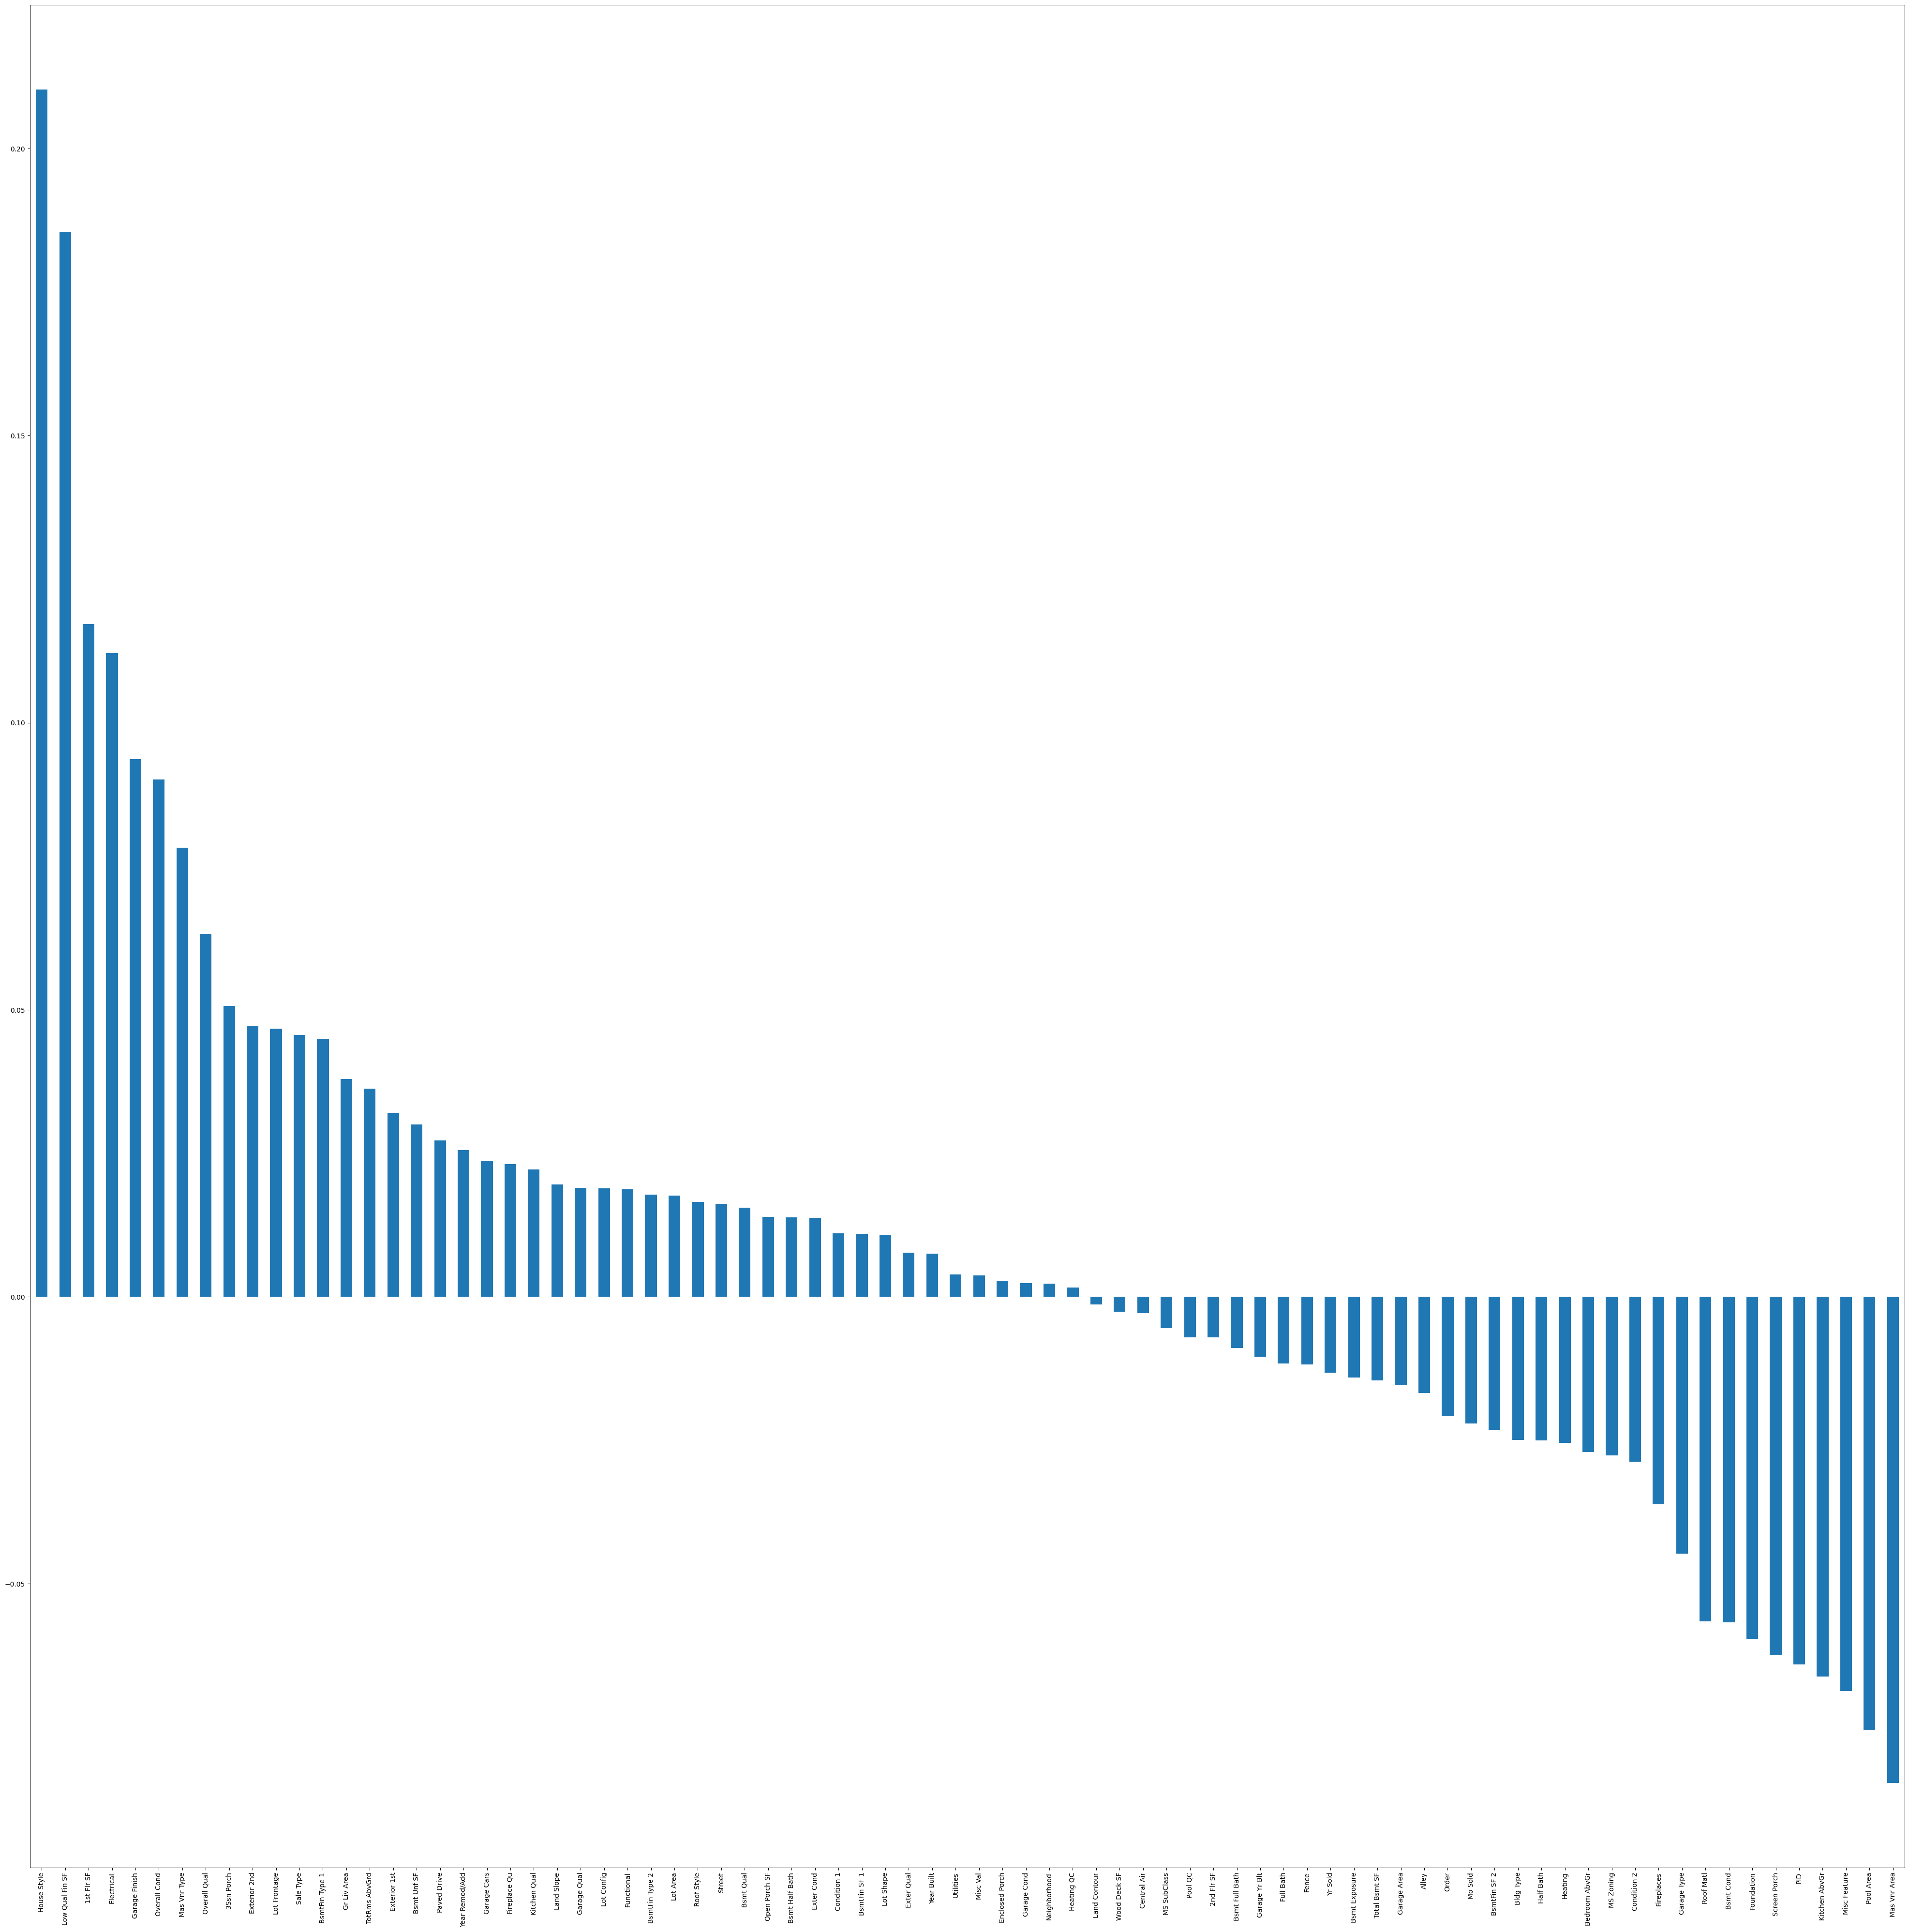

In [251]:
plt.figure(figsize=(50, 50))
pd.Series(rr, index=columnss[:80]).sort_values(ascending=False).plot.bar()

plt.show()

### Gradient Boosting regression

In [252]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version

In [303]:
X_train, X_test, y_train, y_test = train_test_split(
    dfx, dfy, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 1900,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [304]:
reg = ensemble.GradientBoostingRegressor(**params, random_state=42)
reg.fit(X_train, y_train)

grad_pred = reg.predict(X_test)

In [305]:
r2reg = reg.score(X_test, y_test)
msereg = mean_squared_error(y_test, grad_pred)
rmsereg = np.sqrt(msereg)

print(f"R2: {r2reg}") ##R2: 0.9006249118729086  (n = 1900)
print(f"MSE: {msereg}")
print(f"RMSE: {rmsereg}")

R2: 0.9006249118729086
MSE: 0.11223847288205857
RMSE: 0.33502010817570127


# **Model Comparison**

In [307]:
comp = {'index':['Lasso', 'Linreg', 'Ridge', 'Gradient'], 'R2':[r2lasso, r2linreg, r2ridge_cv, r2reg], 'MSE':[mselasso, mselinreg, mseridge_cv, msereg], 'RMSE':[rmselasso, rmselinreg, rmseridge_cv, rmsereg]}
dfcomp = pd.DataFrame(comp)
dfcomp.set_index('index', inplace=True)
dfcomp

,R2,MSE,RMSE
index,,,
Lasso,0.862986,0.172190,0.414957
Linreg,0.861470,0.174095,0.417247
Ridge,0.861551,0.173993,0.417125
Gradient,0.900625,0.112238,0.335020


## Best model = Gradient Boosting